### Packages

In [3]:
# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


# Added
import statsmodels.formula.api as smf
import ast # used for converting string lists to lists with string elements

### Functions

In [4]:
def plot_linear_regression(df, dependent_variable, independent_variable):
    """
    Function 
    """
    # Filter NaN values from specific columns
    #df = df.dropna(subset=[dependent_variable, independent_variable])
    #df = df.reset_index(drop=True)


    # Declare the model
    formula = f"{dependent_variable} ~ {independent_variable}"
    mod = smf.ols(formula=formula, data=df)

    # Fit the model
    np.random.seed(2)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())

    # Plot the distribution of dependent_variable and independent_variable
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[dependent_variable], kde=True)
    plt.title(f"Distribution of {dependent_variable}")

    plt.subplot(1, 2, 2)
    sns.histplot(df[independent_variable], kde=True)
    plt.title(f"Distribution of {independent_variable}")

    plt.tight_layout()
    plt.show()

    # Plot the linear regression line and regression points
    #plt.figure(figsize=(8, 4))
    #sns.scatterplot(x=independent_variable, y=dependent_variable, data=df, alpha=0.5)
    #sns.regplot(x=independent_variable, y=dependent_variable, data=df, scatter=False, color='red', line_kws={'label':'Linear Regression Line'})

    #plt.title(f"Linear Regression: {dependent_variable} vs. {independent_variable}")
    #plt.xlabel(independent_variable)
    #plt.ylabel(dependent_variable)
    #plt.legend()
    #plt.show()

In [5]:
def plot_dual_scatterplots(df, x_variable, dependent_variable1, dependent_variable2):
    """
    Function to plot scatterplots with linear regression for two dependent variables against a single independent variable.
    Includes correlation coefficients on the plots.
    """
    # Handling missing data
    df = df.dropna(subset=[x_variable, dependent_variable1, dependent_variable2])

    # Calculate correlation coefficients
    corr_coef1 = stats.pearsonr(df[x_variable], df[dependent_variable1])[0]
    corr_coef2 = stats.pearsonr(df[x_variable], df[dependent_variable2])[0]
    
    # Get the current default color palette
    palette = sns.color_palette("deep")
    standard_blue = palette[0]
    standard_orange = palette[1]

    # Setting up the matplotlib figure
    plt.figure(figsize=(15, 6))

    # Scatter plot with regression line for dependent_variable1
    plt.subplot(1, 2, 1)
    sns.regplot(x=x_variable, y=dependent_variable1, data=df, color=standard_blue, scatter_kws={'alpha':0.5}, line_kws={'color':standard_blue})
    plt.title(f"Scatter Plot with Regression: {dependent_variable1} vs. {x_variable}", fontsize=16)
    plt.text(0.1, 0.9, f"r={corr_coef1:.2f}", transform=plt.gca().transAxes, fontsize=14)  # Adjust position as needed
    plt.xlabel(x_variable, fontsize=14)
    plt.ylabel(dependent_variable1, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Scatter plot with regression line for dependent_variable2
    plt.subplot(1, 2, 2)
    sns.regplot(x=x_variable, y=dependent_variable2, data=df, color=standard_orange, scatter_kws={'alpha':0.5}, line_kws={'color':standard_orange})
    plt.title(f"Scatter Plot with Regression: {dependent_variable2} vs. {x_variable}", fontsize=16)
    plt.text(0.1, 0.9, f"r={corr_coef2:.2f}", transform=plt.gca().transAxes, fontsize=14)  # Adjust position as needed
    plt.xlabel(x_variable, fontsize=14)
    plt.ylabel(dependent_variable2, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()



In [6]:
plot_dual_scatterplots(movie_metadata,'Movie_release_year', 'TMDB_vote_average', 'log_balanced_Movie_box_office_revenue')

NameError: name 'movie_metadata' is not defined

In [ ]:
def linear_regression(df, dependent_variable, independent_variables, categorical_variables=None):
    """
    Function to plot linear regression and distributions.

    Parameters:
    - df: DataFrame
    - dependent_variable: str, the name of the dependent variable
    - independent_variables: list, names of the independent variables (numerical or categorical)
    - categorical_variables: list, names of categorical variables

    """
    # Ensure independent_variables is a list
    if not isinstance(independent_variables, list):
        independent_variables = [independent_variables]

    # Ensure categorical_variables is a list
    if categorical_variables is None:
        categorical_variables = []
    elif not isinstance(categorical_variables, list):
        categorical_variables = [categorical_variables]

    # Filter NaN values from specific columns
    #columns_to_filter = [dependent_variable] + independent_variables + categorical_variables
    #df = df.dropna(subset=columns_to_filter)
    #df = df.reset_index(drop=True)

    # Construct the formula
    formula = f"{dependent_variable} ~ {' + '.join(independent_variables)}"

    # Include categorical variables in the formula
    if categorical_variables:
        categorical_formula = ' + '.join([f'C({var})' for var in categorical_variables])
        formula += f" + {categorical_formula}"

    # Fit the model
    mod = smf.ols(formula=formula, data=df)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())
    
    # Plot the distribution of dependent_variable and independent_variables
    plt.figure(figsize=(12, 6))

    plt.subplot(1, len(independent_variables) + 1, 1)
    sns.histplot(df[dependent_variable], kde=True)
    plt.title(f"Distribution of {dependent_variable}")

    for i, variable in enumerate(independent_variables, start=2):
        plt.subplot(1, len(independent_variables) + 1, i)
        sns.histplot(df[variable], kde=True)
        plt.title(f"Distribution of {variable}")

    plt.tight_layout()
    plt.show()

# Data import

We begin by loading the two data sets and looking at the different attributes. We decide to add two columns **Movie release year** and **Actor birth year**.

In [7]:
# Load datasets
data_folder = './data/'
movie_metadata = pd.read_csv(data_folder   + 'movie_cleaned.csv', lineterminator='\n')

# Replace spaces with underscores in column names
movie_metadata.columns = movie_metadata.columns.str.replace(' ', '_')


FileNotFoundError: [Errno 2] No such file or directory: './data/movie_cleaned.csv'

# Start Emma

**TMDB vote average**

Having filtered the data so every movie have at least 20 reviews we can now do a linear regression on TMDB vote average and movie release year

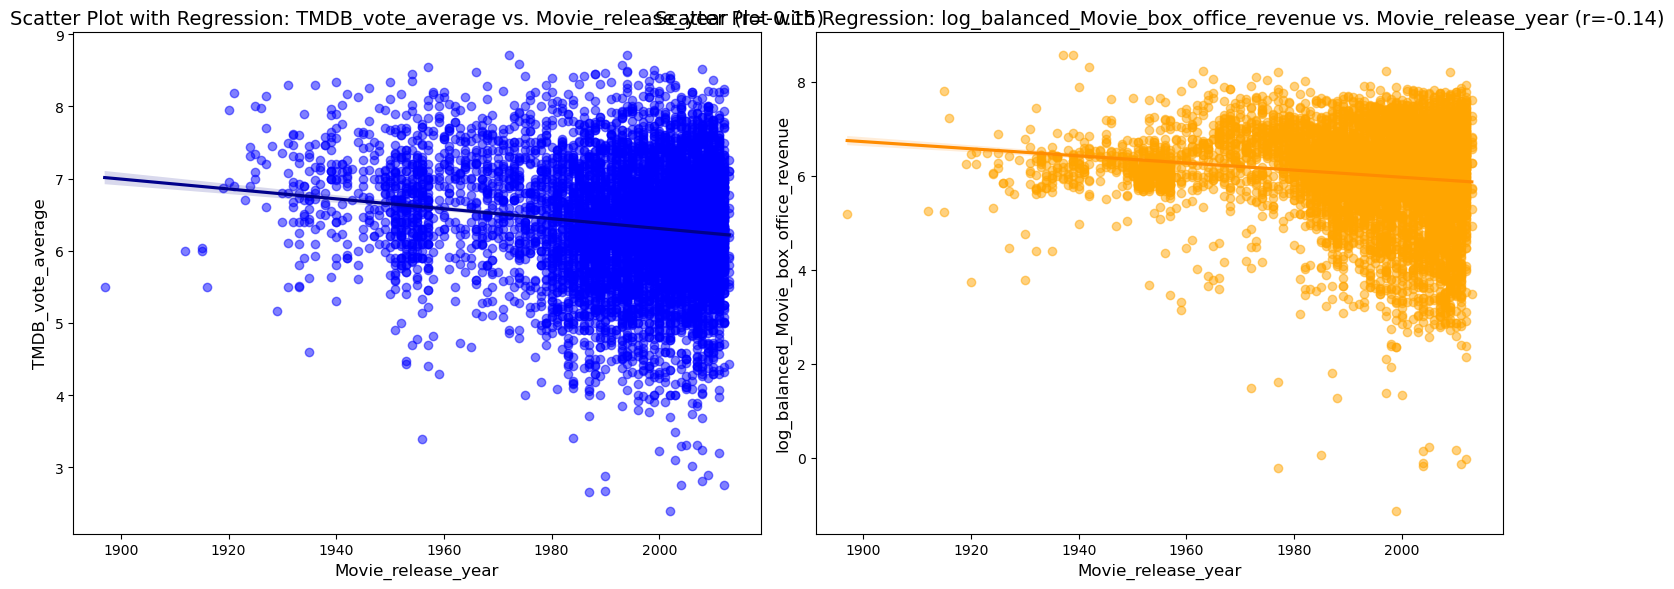

In [ ]:
#plot_linear_regression(movie_metadata, "TMDB_vote_average", "Movie_release_year")

plot_dual_scatterplots(movie_metadata,'Movie_runtime', 'TMDB_vote_average', 'log_balanced_Movie_box_office_revenue')

**Runtime**



                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     842.8
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          9.67e-176
Time:                        14:17:08   Log-Likelihood:                -8774.9
No. Observations:                7537   AIC:                         1.755e+04
Df Residuals:                    7535   BIC:                         1.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.0386      0.046    109.062

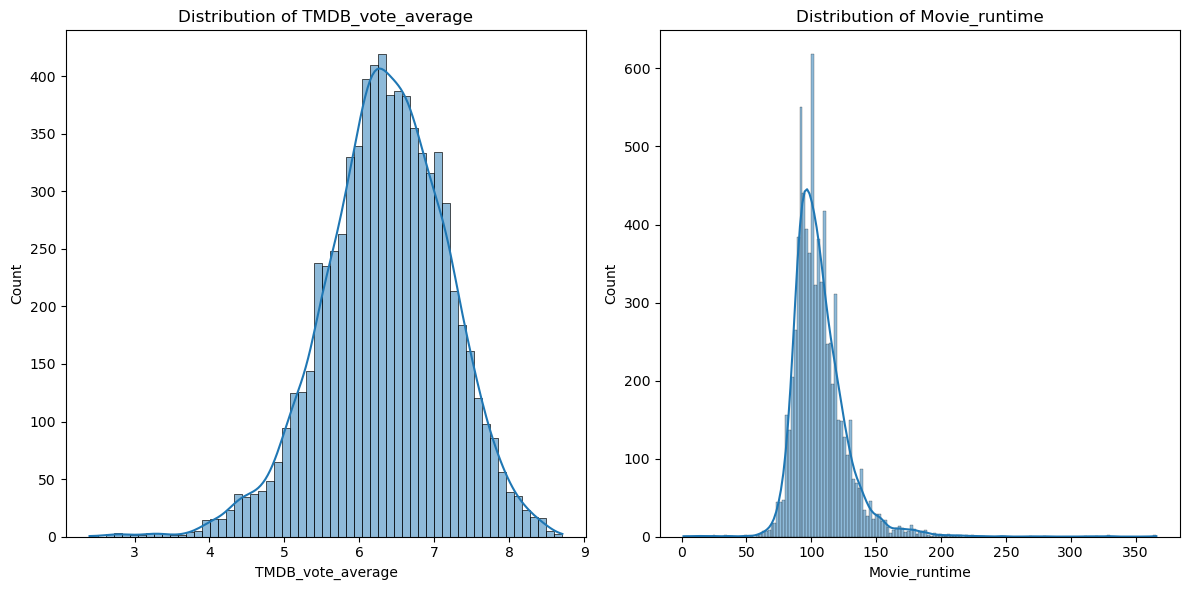

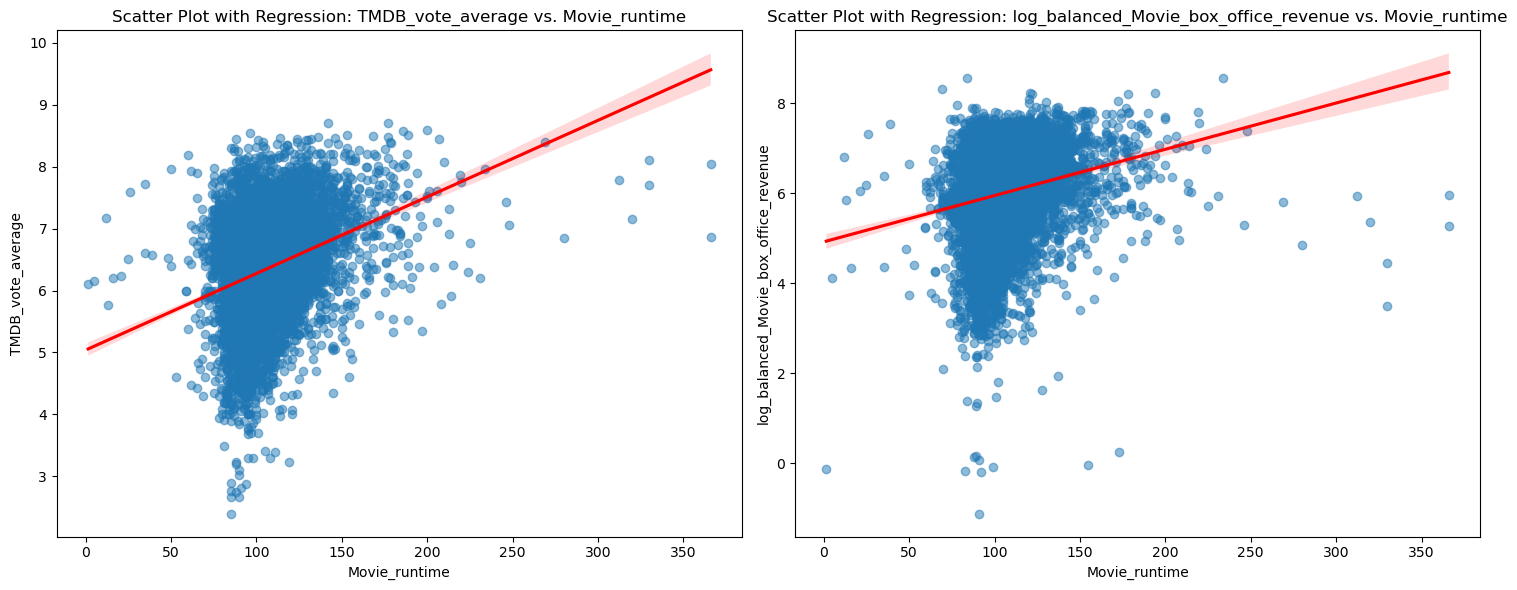

In [ ]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "Movie_runtime")
plot_dual_scatterplots_with_regression(movie_metadata, 'Movie_runtime', 'TMDB_vote_average', 'log_balanced_Movie_box_office_revenue')


**Vote count log**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     1640.
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:58:41   Log-Likelihood:                -8465.3
No. Observations:                7563   AIC:                         1.693e+04
Df Residuals:                    7561   BIC:                         1.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.0919    

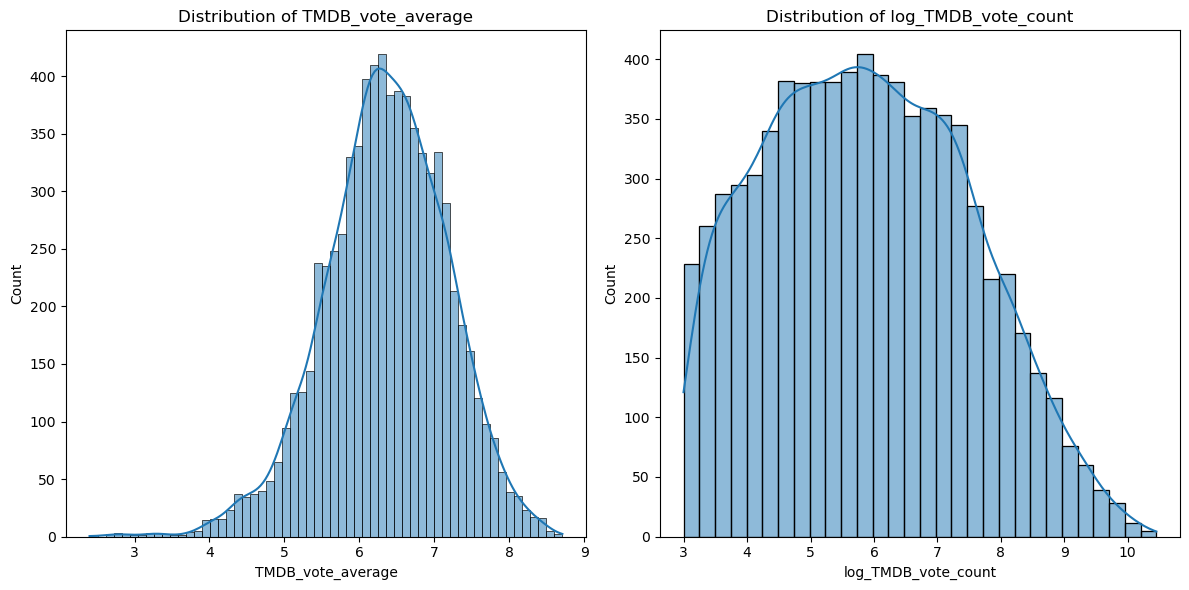

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


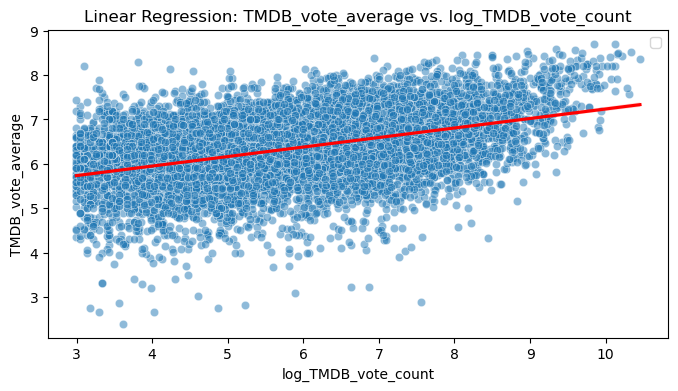

In [ ]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "log_TMDB_vote_count")

**TMDB vote average vs log Movie box office revenue**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     261.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           9.37e-58
Time:                        13:58:43   Log-Likelihood:                -9079.1
No. Observations:                7563   AIC:                         1.816e+04
Df Residuals:                    7561   BIC:                         1.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

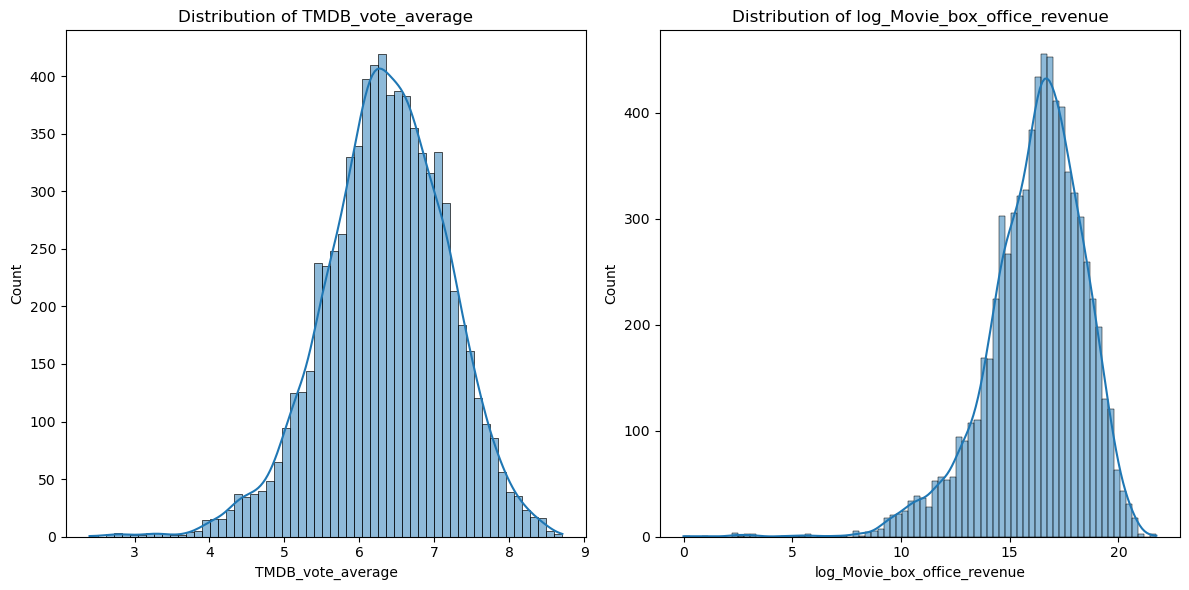

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


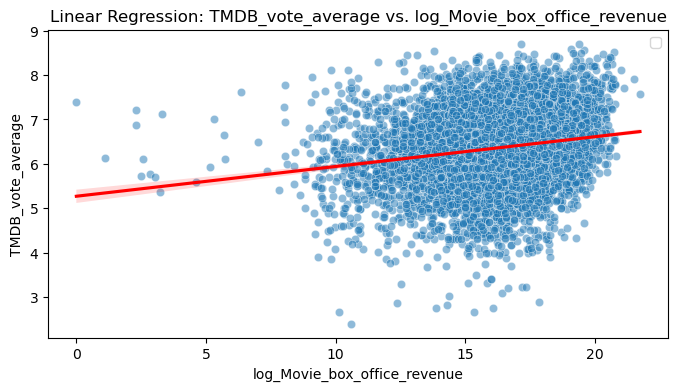

In [ ]:
plot_linear_regression(movie_metadata,"TMDB_vote_average","log_Movie_box_office_revenue")

**TMDB vote average log movie box office revenue/log tmdb budget**

In [ ]:
movie_metadata['log_revenue_div_budget'] = np.log1p(
    (movie_metadata['Movie_box_office_revenue'] - movie_metadata['TMDB_budget']) / movie_metadata['TMDB_budget']
)
plot_linear_regression(movie_metadata,"TMDB_vote_average","log_revenue_div_budget")

MissingDataError: exog contains inf or nans

**Male actor percentage**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.857
Date:                Wed, 20 Dec 2023   Prob (F-statistic):             0.0155
Time:                        12:39:28   Log-Likelihood:                -11767.
No. Observations:                9194   AIC:                         2.354e+04
Df Residuals:                    9192   BIC:                         2.355e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.19

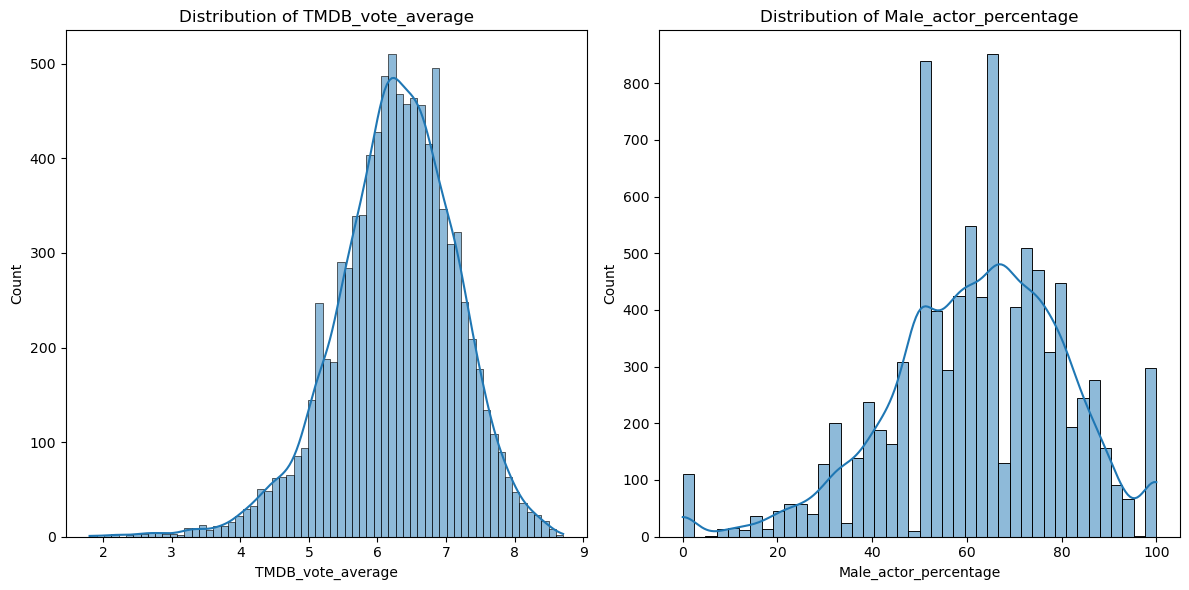

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


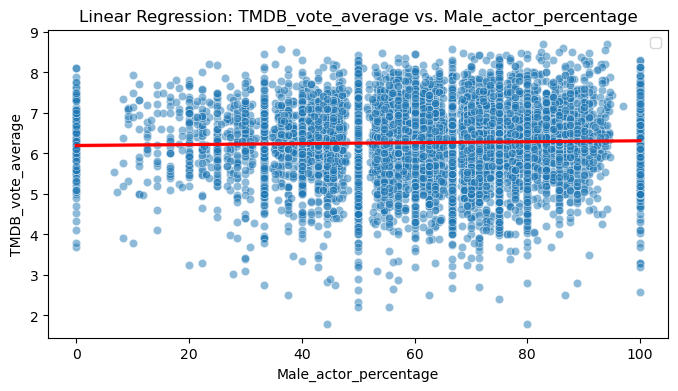

In [ ]:
plot_linear_regression(movie_metadata,'TMDB_vote_average','Male_actor_percentage')

**Average age of actors**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01854
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.892
Time:                        12:39:30   Log-Likelihood:                -11371.
No. Observations:                8896   AIC:                         2.275e+04
Df Residuals:                    8894   BIC:                         2.276e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

KeyboardInterrupt: 

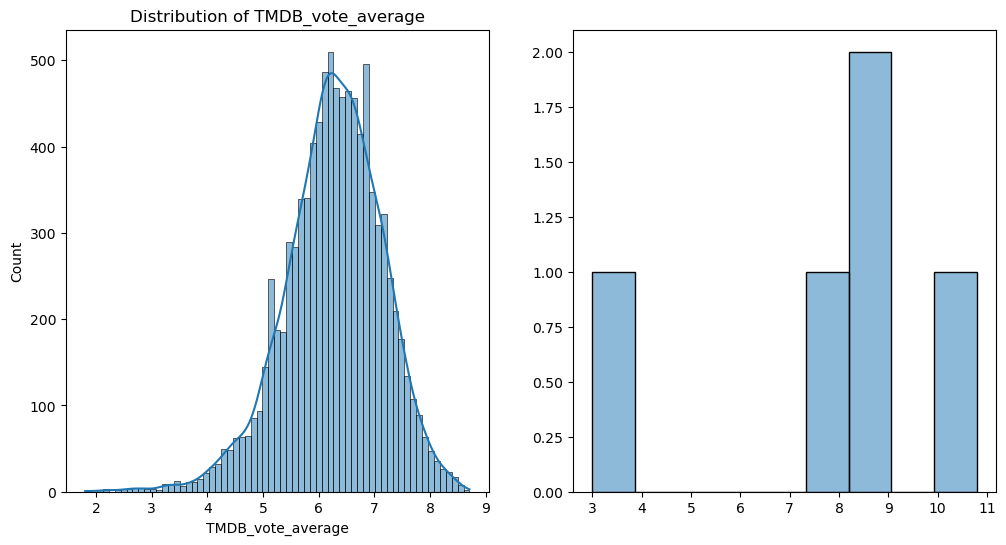

In [ ]:
plot_linear_regression(movie_metadata,'TMDB_vote_average','Mean_actor_age_at_movie_release')